# Titanic EDA and 1R with ChatGPT

The goal of this notebook is to create a 1R-model ([One Rule](https://datacadamia.com/data_mining/one_rule), also see related [paper](https://link.springer.com/article/10.1023/A:1022631118932)) of the [Titanic Kaggle Competition](https://www.kaggle.com/competitions/titanic) after doing EDA ([Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)), supported by ChatGPT. 

The concept of a 1R-model was referred to [at the end of lesson 5 of the 2022 Fast.AI course](https://youtu.be/_rXzeWq4C6w?t=6096) as a simple approach for formulating a baseline with little effort. To make this a little more interesting (inspired by by [this notebook](https://www.kaggle.com/code/jacoporepossi/how-to-use-chatgpt-in-a-competition-eda-part-1)) and to further reduce the effort, I let ChatGPT write the code to practice some prompt engineering. (Prompts will be indicated by the chat emoji 💬)

As you will notice going through the notebook, working with ChatGPT really is a conversation, and sometimes you have to ask for quite similar things, especially if you did not ask precisely enough 😉. As a result, you could get the impression that is the notebook is too long. If that is the case for you, just focus on the text of this notebook and the first and final set of charts.

As a next iteration cycle for ChatGPT, once the API is available, I would really like to have a Jupyter interface in which I can write prompts, and as a result a code cell (and markdown cell) would be filled with the ChatGPT's response. This would save the need for lot's of copy&paste.

## Key learnings

While the content of this notebook could be considered mediocre, I learned quite a lot about ChatGPT and how to interact with it:

* It is really important to **be explicit in your prompts**: State what you really want, ChatGPT is not really great at reading between the lines, or extrapolating what might be inferred. As you go through the notebook, you will see me make that mistake. But than again, by talking to ChatGPT, you can refine the prompts along the way. Essentially, this notebook therefore is a commented version of my conversation with ChatGPT.
* Responses from ChatGPT are somewhat random, so the exact code is hard to reproduce with the same prompts. (You can also see that by using the regenerate response button which creates different versions of responses.)
* **I never used the seaborn library before**, and producing the same same visualizations, coding them manually, would have taken me considerably more time. True, talking through this exercise with ChatGPT a few times while preparing this notebook did not make me an expert in seaborn and I would still have a hard time coding all this myself, but I am honestly fine with that. For this use case I see **ChatGPT as a _"productivity buddy"_** where ChatGPT can to 80-90% of the work, and I take the role of the instructor / interpreter / reviewer.
* ChatGPT makes error along the way, but you can always ask ChatGPT to fix the problem, which works surprisingly well, especially when it is related to the syntax of the code. Tweaking the output of working code is a bigger challenge for ChatGPT because it can neither run/debug the code or see the result the code produces. All it can do is read the code and respond (with variations).
* ChatGPT has limit on the length of the answer it can produce. Depending in the task, you might need to prompt it in a way to produce concise code (see below for more details)
* As [Andrej Karpathy tweeted](https://twitter.com/karpathy/status/1617979122625712128): **_"The hottest new programming language is English"_**. I actually used English as a programming language, and ChatGPT was merely translating to python. Somehow this felt like "real life" (whatever that is 😉), in which I am a software consultant: A typical workflow in that business is writing a specification document, giving it to a developer who writes the code, and getting the result after some time. With ChatGPT, the iteration cycles are 1 to 2 orders of magnitude faster, and **iteration speed is essential**. Even a super-skilled human developer would be considerably slower, because ChatGPT is just "[typing so much faster](https://twitter.com/ylecun/status/1625126386506797057)".
* I also wrote about my experience of coding together with ChatGPT [in this blog post](https://chrwittm.github.io/posts/2023-03-05-titanic-with-chatgpt/)

So much for the intro, here is my conversation with ChatGPT.

## Notebook Preparation

In this section, let's do the imports and load the data. In addition, I have collected some formatting options from other notebooks which can be used if needed.

In [1]:
from fastai.imports import * #https://github.com/fastai/fastai/blob/master/fastai/imports.py
np.set_printoptions(linewidth=130)      #<- adjust this to your liking
#pd.options.display.max_colwidth = 200  #<- adjust this to your liking
#pd.options.display.max_rows = 500      #<- adjust this to your liking
#plt.rc('figure', dpi=90)               #<- adjust this to your liking

In [2]:
from pathlib import Path
import os

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle:
    path = Path('../input/titanic')
    !pip install -Uqq fastai
else:
    import zipfile,kaggle
    path = Path('titanic')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)


In [3]:
df = pd.read_csv(path/'train.csv')
tst_df = pd.read_csv(path/'test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will need a list of columns for the first prompt: 

In [5]:
columns = df.columns.tolist()
print(df.columns.tolist())
print(len(columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
12


## EDA (Exploratory data analysis) of the Titanic Dataset



Here is the initial prompt to start EDA:

> 💬: Provide python code to analyze a tabular kaggle competition. The dataset comes from the Titanic Dataset, the task is to classify whether passengers survived or not (binary classification). There are 10 available features, here's a list: 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'.
> Write some EDA code in seaborn to explore the dataset, visualizing the distributions of the features. Add title, legends, axis names and if possible, group the plots in subplots for a better understanding of the data.
The dataset has already been loaded as df, so no need to read the file.

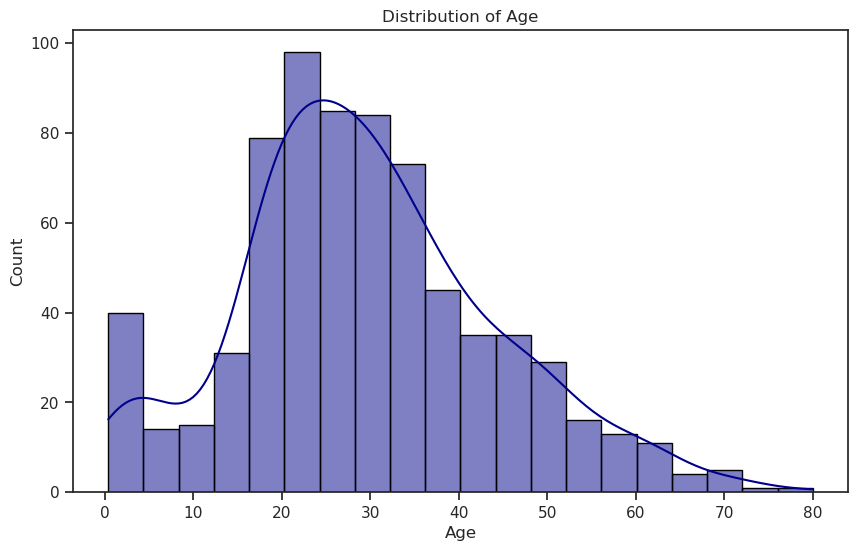

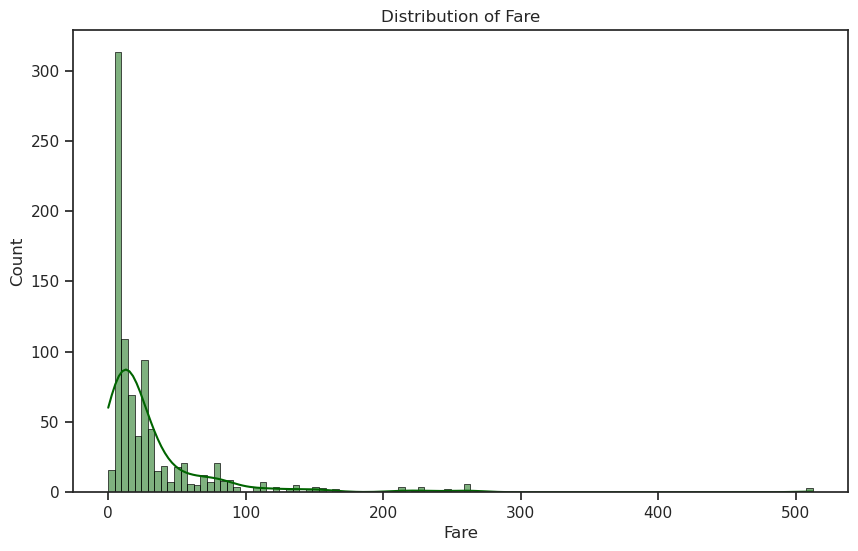

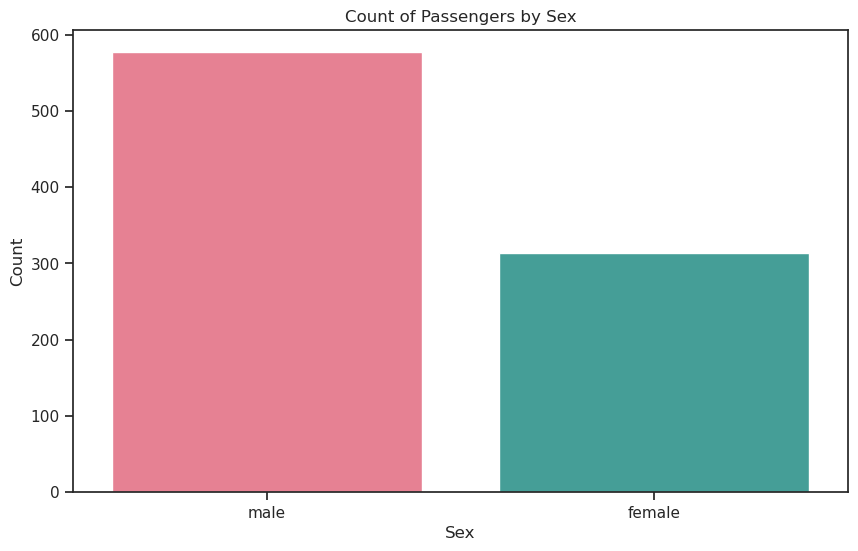

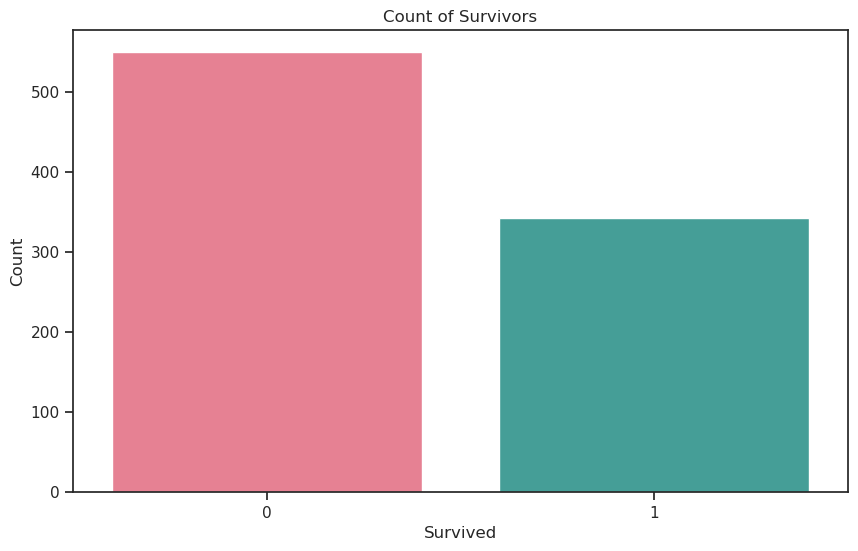

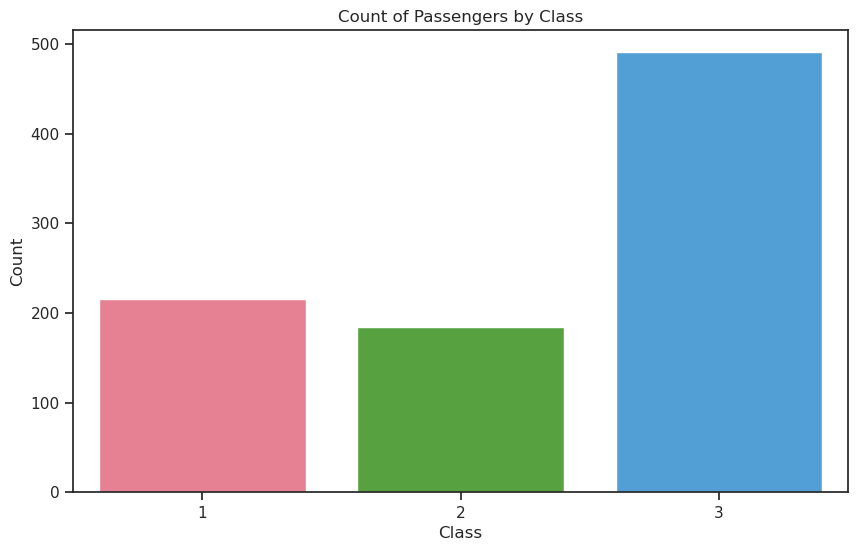

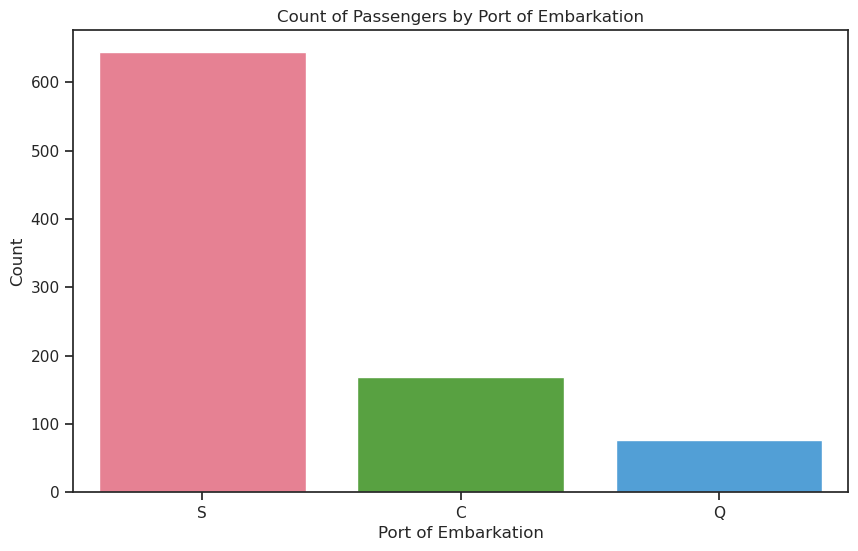

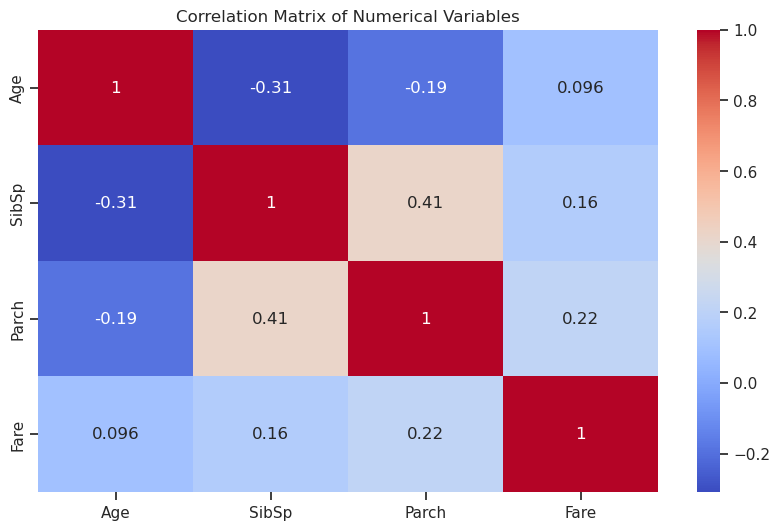

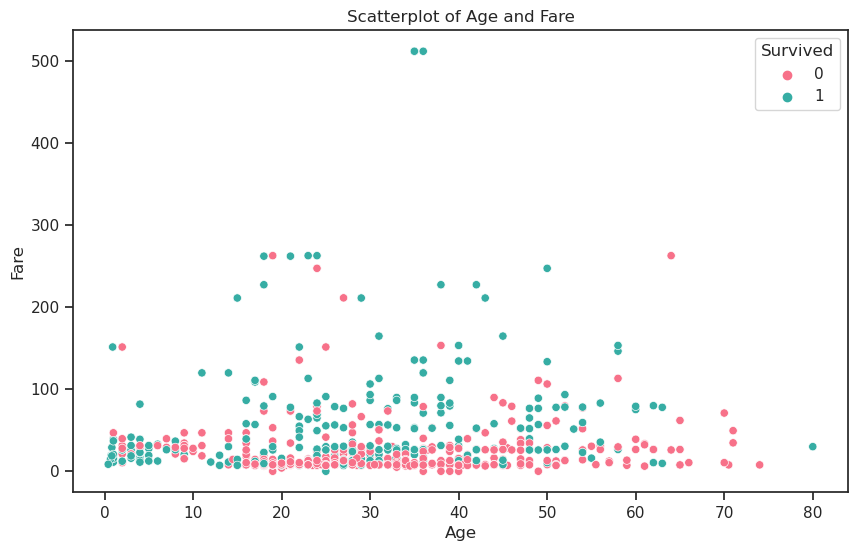

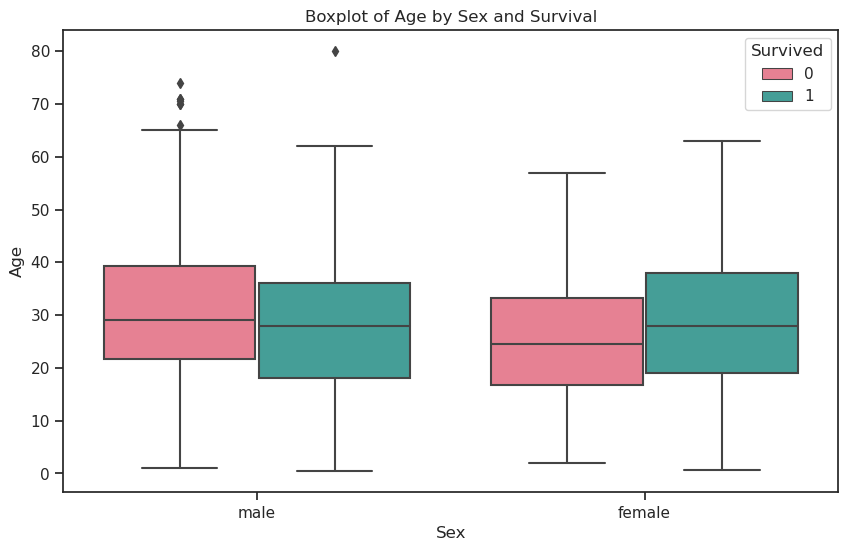

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="ticks")

# Plot distribution of Age variable
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['Age'], ax=ax, kde=True, color='darkblue', edgecolor='black')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Plot distribution of Fare variable
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['Fare'], ax=ax, kde=True, color='darkgreen', edgecolor='black')
ax.set_title('Distribution of Fare')
ax.set_xlabel('Fare')
ax.set_ylabel('Count')

# Plot count of Sex variable
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Sex', ax=ax, palette='husl')
ax.set_title('Count of Passengers by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

# Plot count of Survived variable
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Survived', ax=ax, palette='husl')
ax.set_title('Count of Survivors')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

# Plot count of Pclass variable
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', ax=ax, palette='husl')
ax.set_title('Count of Passengers by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Plot count of Embarked variable
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', ax=ax, palette='husl')
ax.set_title('Count of Passengers by Port of Embarkation')
ax.set_xlabel('Port of Embarkation')
ax.set_ylabel('Count')

# Plot correlation matrix of numerical variables
numerical_vars = ['Age', 'SibSp', 'Parch', 'Fare']
fig, ax = plt.subplots(figsize=(10, 6))
corr = df[numerical_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Numerical Variables')

# Plot scatterplot of Age and Fare variables
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='husl', ax=ax)
ax.set_title('Scatterplot of Age and Fare')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(title='Survived', loc='upper right')

# Plot boxplot of Age and Sex variables
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Sex', y='Age', hue='Survived', palette='husl', ax=ax)
ax.set_title('Boxplot of Age by Sex and Survival')
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.legend(title='Survived', loc='upper right')

# Show plots
plt.show()

These are some nice visualizations for a first impression of the distributions of the variables. Notice how ChatGPT knows about the dataset and puts content into the visualizations that I have not given it information about: ChatGPT does neither have access to the training data nor the internet, but it still came up with good labels for the charts even though I only mentioned the technical column names. I assume ChatGPT could do that because the dataset is public knowledge and the Titanic voyage as well. But for clarification, we can always ask:

> 💬: I only provided you with the technical names of the fields in the dataframe, how did you derive the descriptions and labels of the charts? 

![](ChatGPT-answer01.png)

Let's continue the EDA journey and find out more on cause and effect:

> 💬: Please expand the visualizations, displaying for each feature how the distribution of values influences the chance of survival. For example, next to the chart "Count of Passengers by Sex" display another chart showing how many males have survived/not survived and how many women have survived/not survived. Do this in a meaningful way for each feature.

The resulting response was too long, because ChatGPT was creating code which was quite repetitive. As a result, the code ChatGPT returned was incomplete. You can notice that also in the code above, it is quite explicit, but not really [dry](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself). In the first response it did not matter, but for this reply it did. I asked ChatGTP about my suspicion, and, indeed, the upper limit of its responses are "around 2048 characters or 400 words":

![](ChatGPT-answer02.png)

Having realized this limitation, here we go again:

> 💬: Please expand the visualizations, displaying for each feature how the distribution of values influences the chance of survival. For example, next to the chart "Count of Passengers by Sex" display another chart showing how many males have survived/not survived and how many women have survived/not survived. Do this in a meaningful way for each feature. Write the code in a dry way ("do not repeat yourself"). For repetitive code create functions for better readability and shorter code.

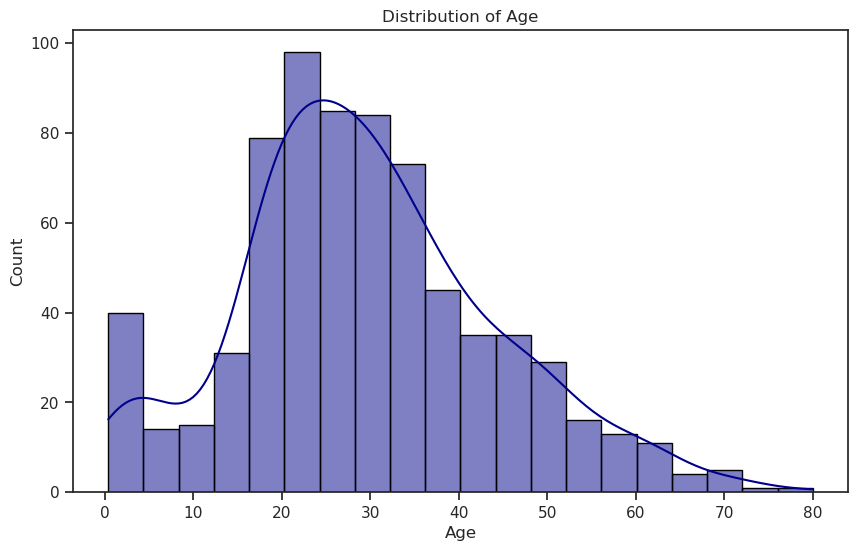

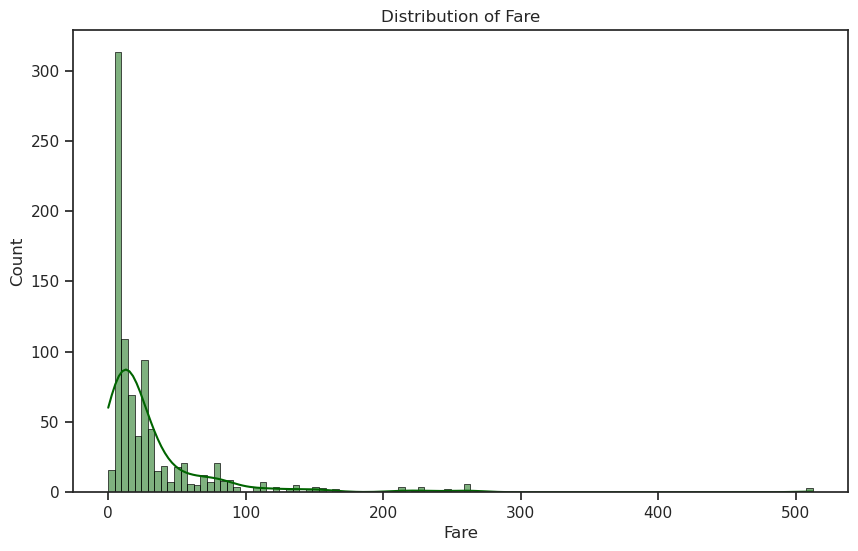

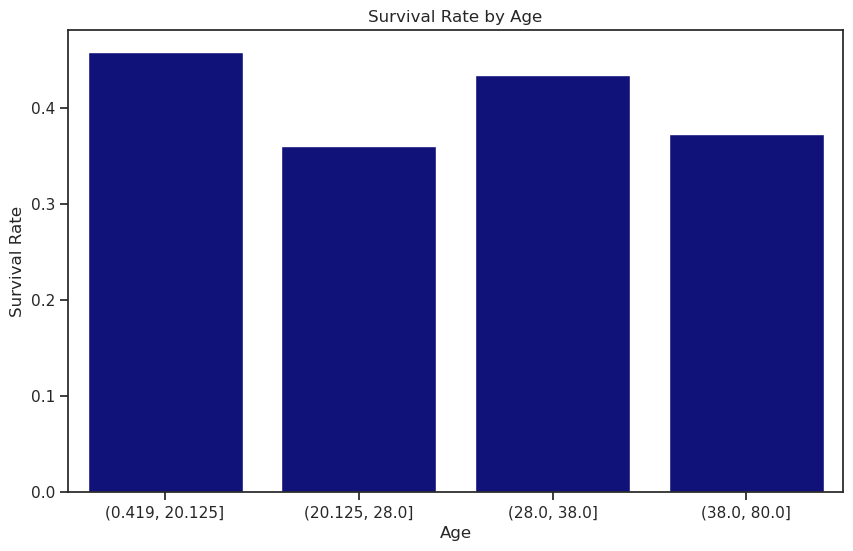

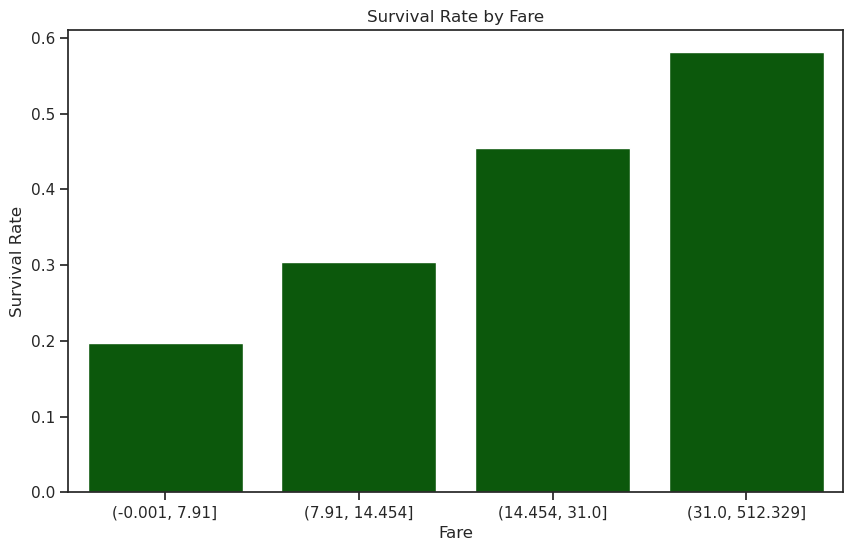

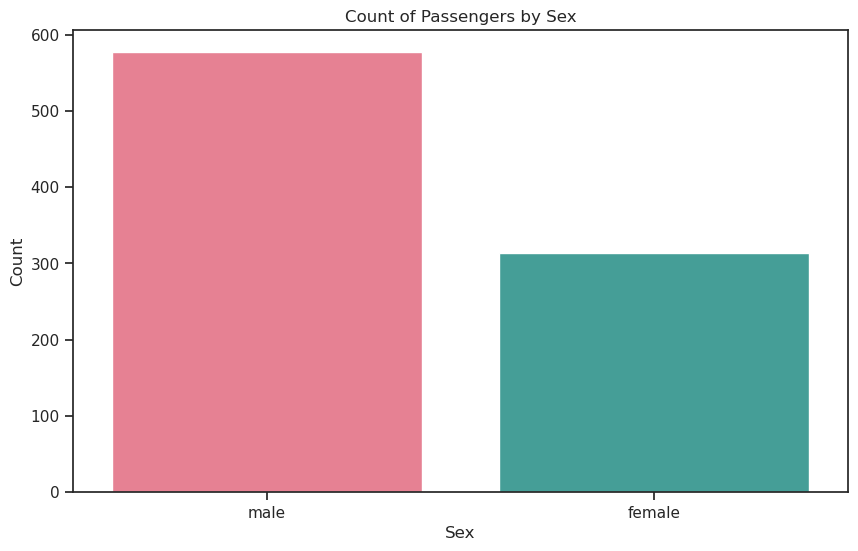

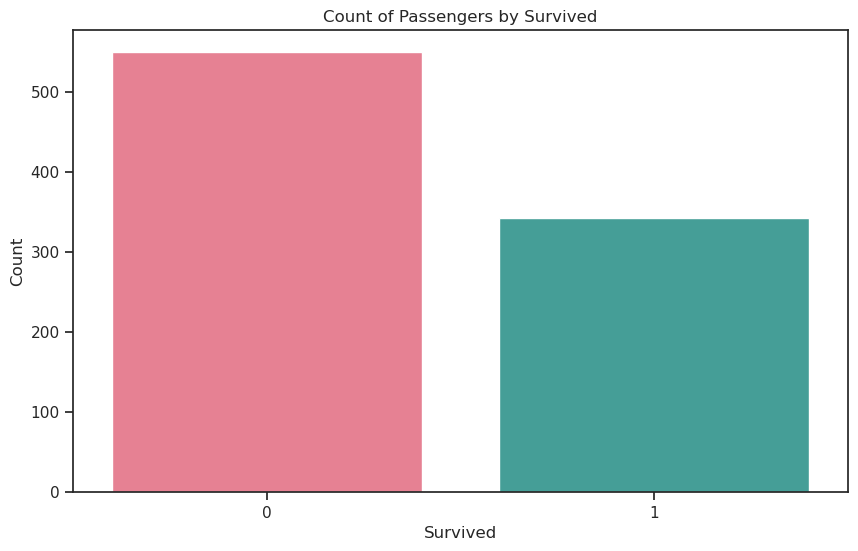

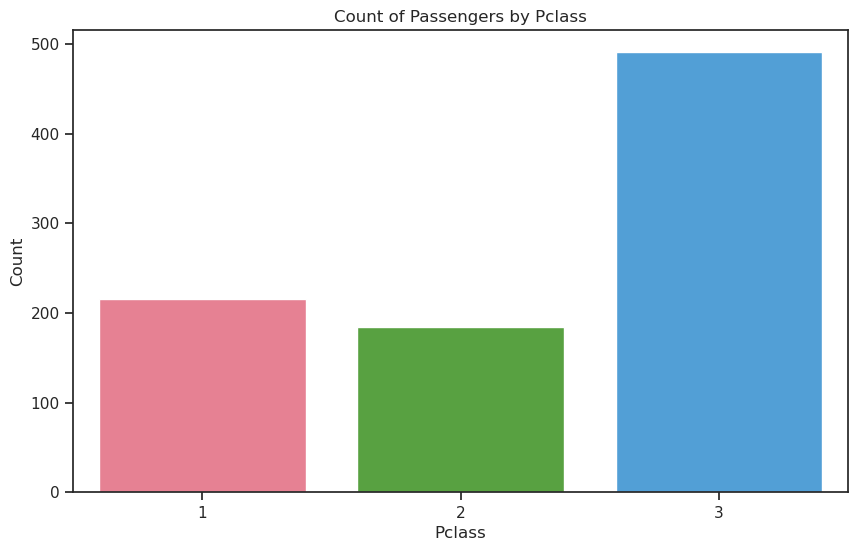

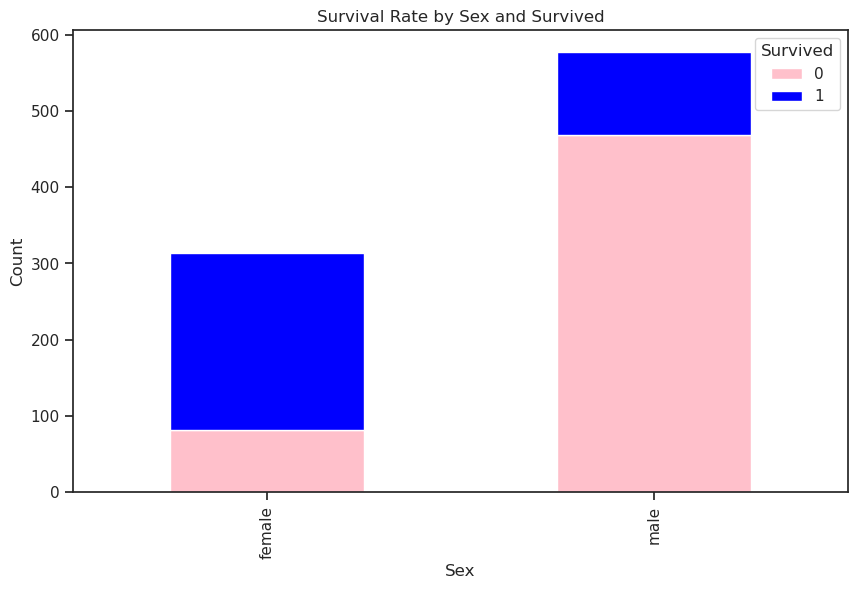

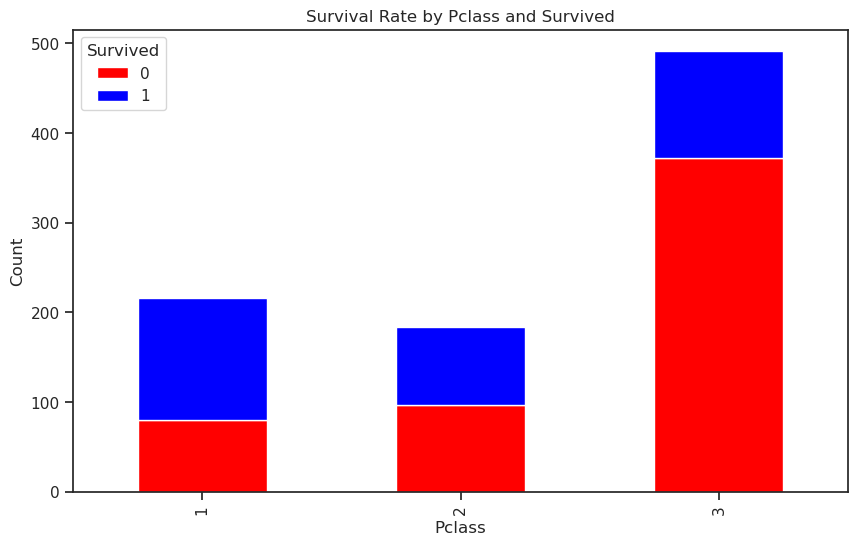

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="ticks")


def plot_distribution(feature, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[feature], ax=ax, kde=True, color=color, edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


def plot_survival_rate_by_feature(feature, color):
    feature_groups = pd.qcut(df[feature], q=4)
    feature_group_survival = df.groupby(feature_groups)['Survived'].mean()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=feature_group_survival.index, y=feature_group_survival.values, color=color, ax=ax)
    ax.set_title(f'Survival Rate by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Survival Rate')


def plot_count_by_feature(feature, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(data=df, x=feature, ax=ax, palette=color)
    ax.set_title(f'Count of Passengers by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


def plot_survival_rate_by_category(feature, category, color):
    category_survival = df.groupby([feature, 'Survived'])[category].count().unstack()
    category_survival.plot(kind='bar', stacked=True, color=color, figsize=(10, 6))
    plt.title(f'Survival Rate by {feature} and {category}')
    plt.xlabel(feature)
    plt.ylabel('Count')


# Plot distributions of Age and Fare variables
plot_distribution('Age', 'darkblue')
plot_distribution('Fare', 'darkgreen')

# Plot survival rates by Age and Fare variables
plot_survival_rate_by_feature('Age', 'darkblue')
plot_survival_rate_by_feature('Fare', 'darkgreen')

# Plot counts of Sex, Survived and Pclass variables
plot_count_by_feature('Sex', 'husl')
plot_count_by_feature('Survived', 'husl')
plot_count_by_feature('Pclass', 'husl')

# Plot survival rates by Sex, Survived and Pclass variables
plot_survival_rate_by_category('Sex', 'Survived', ['pink', 'blue'])
plot_survival_rate_by_category('Pclass', 'Survived', ['red', 'blue'])

The result was not quite what I wanted (especially the layout), but there are some good charts in there. Let's build on the good ones:

> 💬: I like the charts titled "Survival Rate by {feature} and {category}". In a new set of visualizations, keep these charts and apply the same logic to the other features so that it becomes visible which feature values influence survival.

The generated code contained an error, and I asked ChatGPT to fix it:

> 💬: There is a error: `ValueError: Invalid color h` - Please correct the code

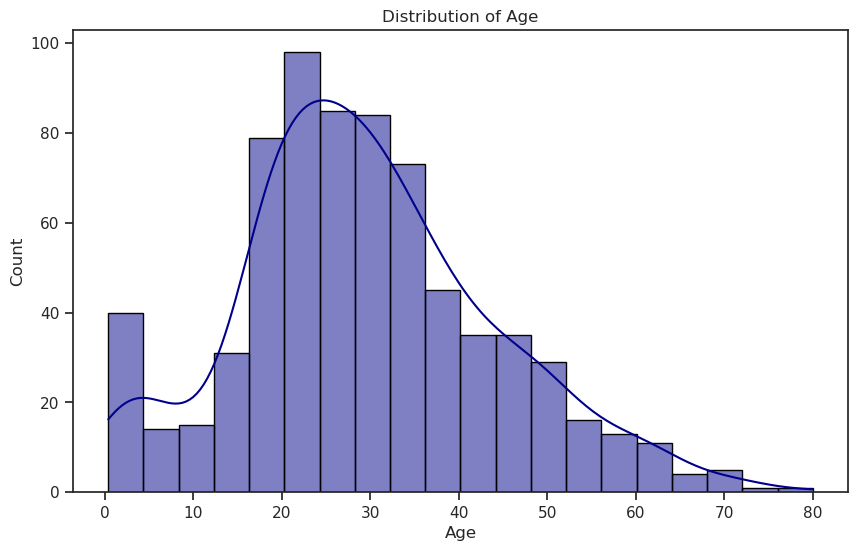

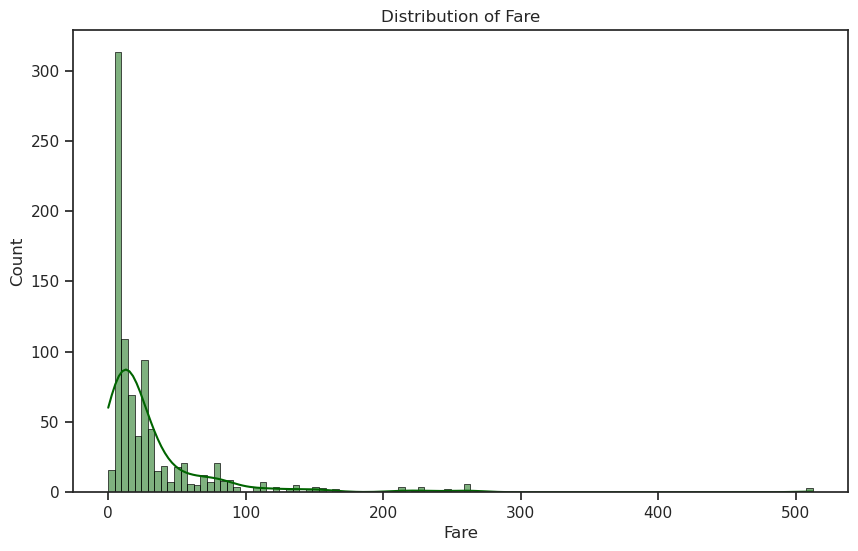

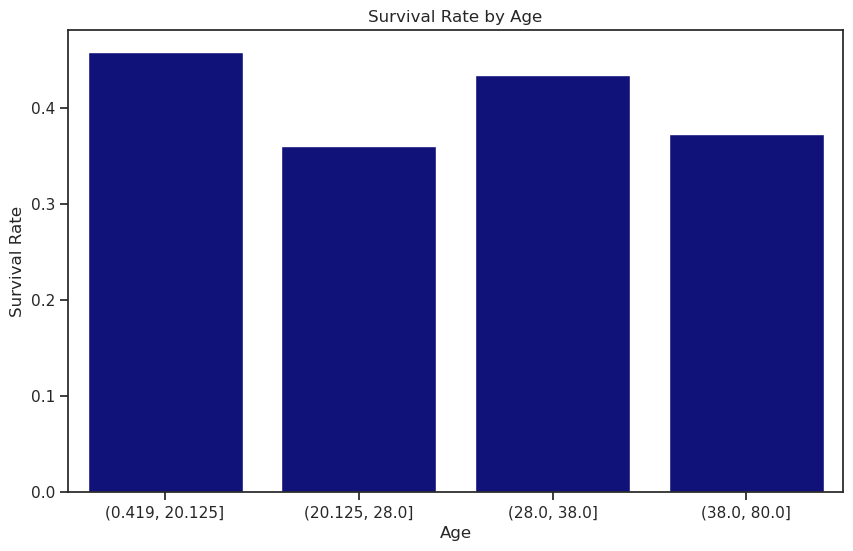

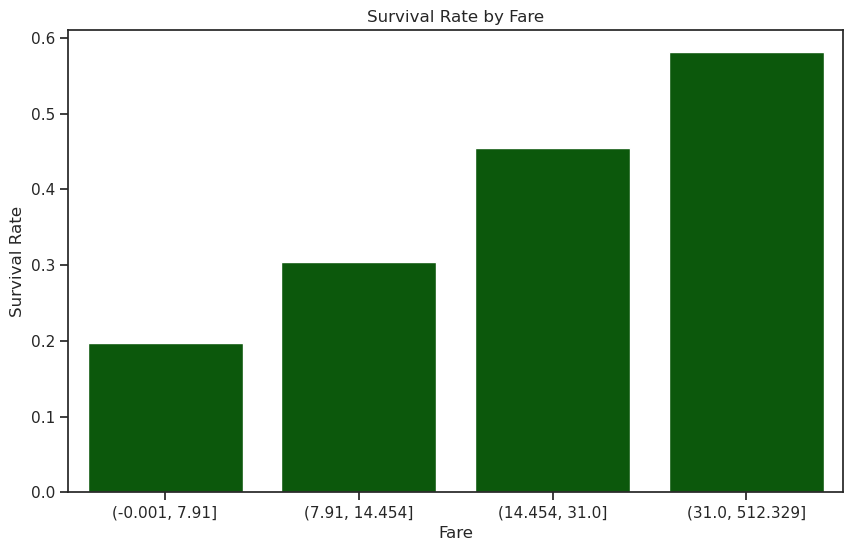

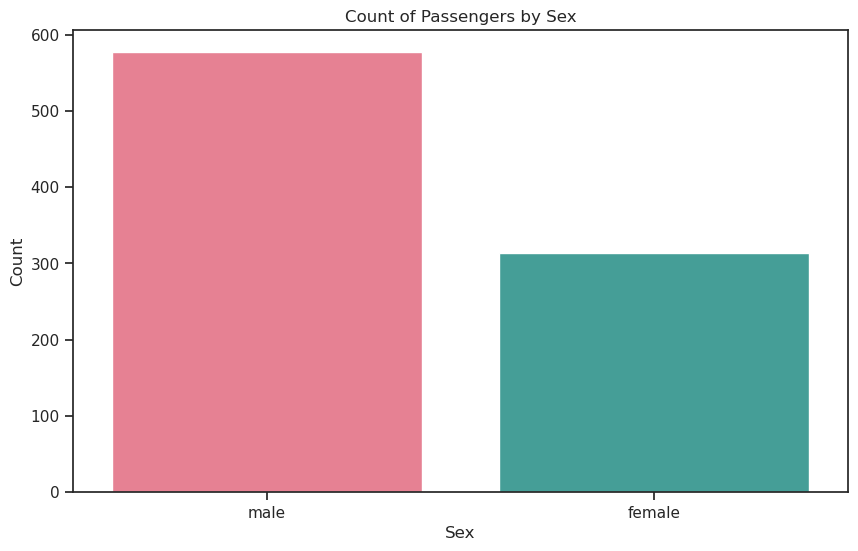

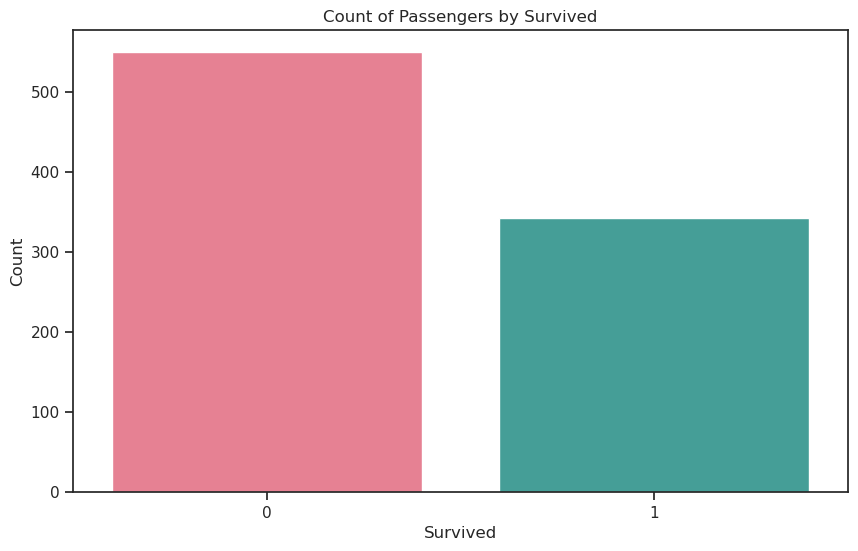

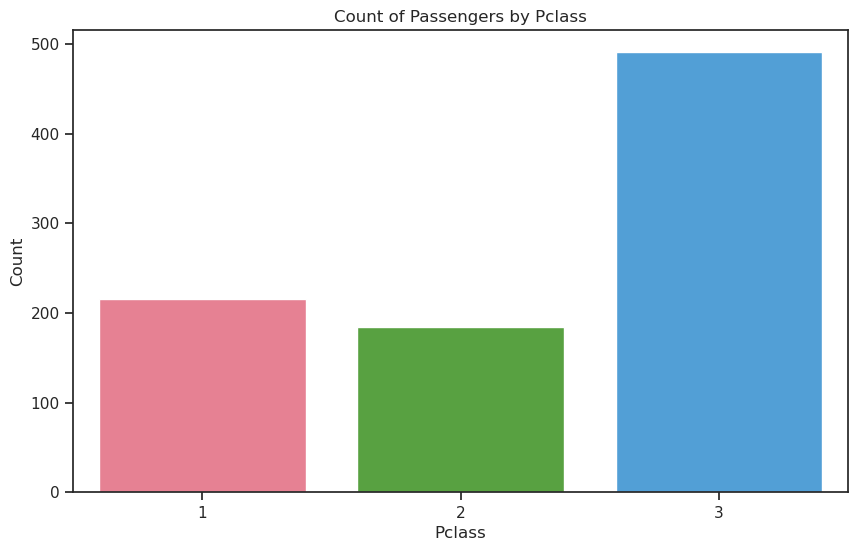

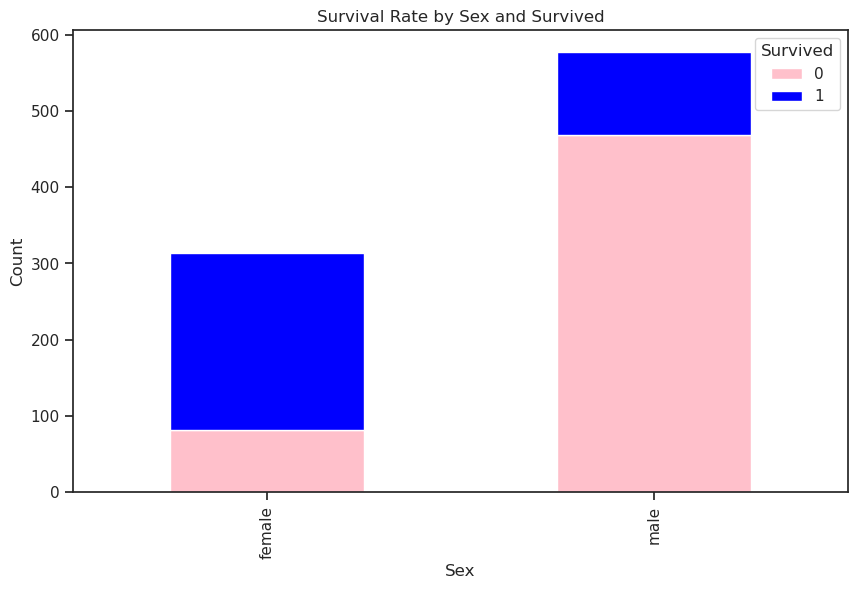

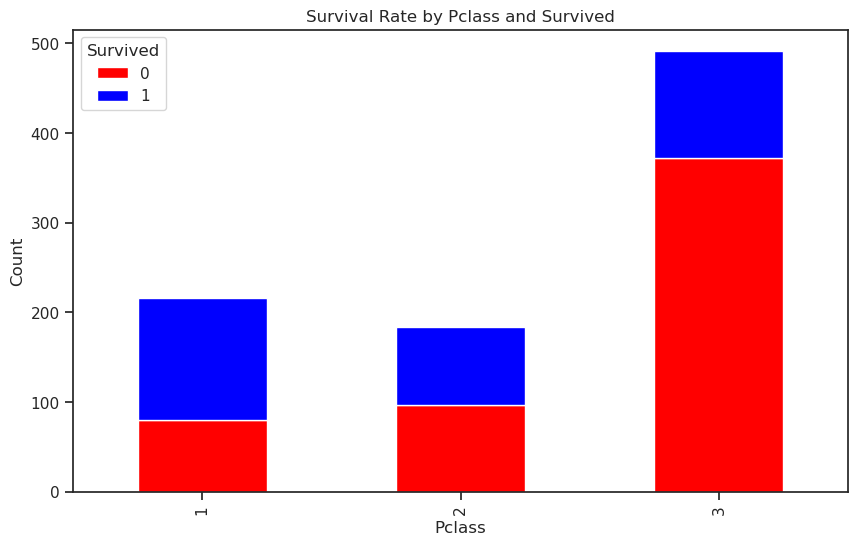

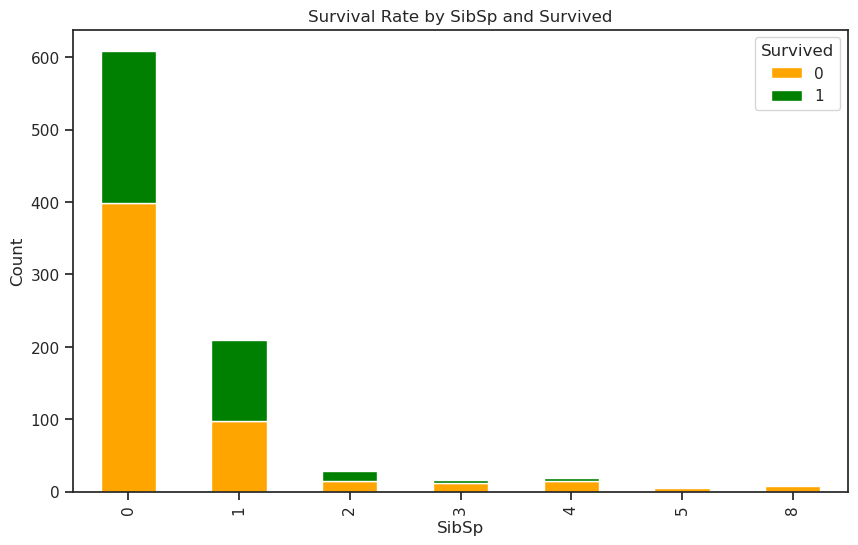

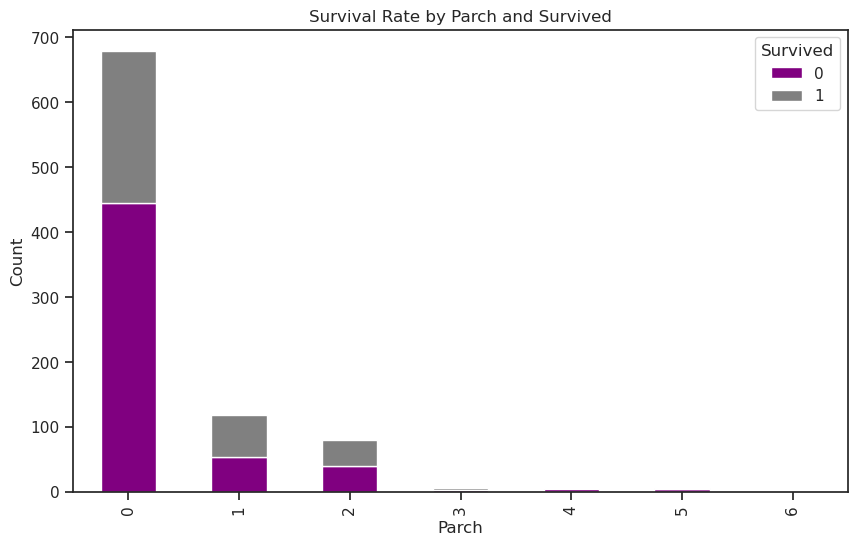

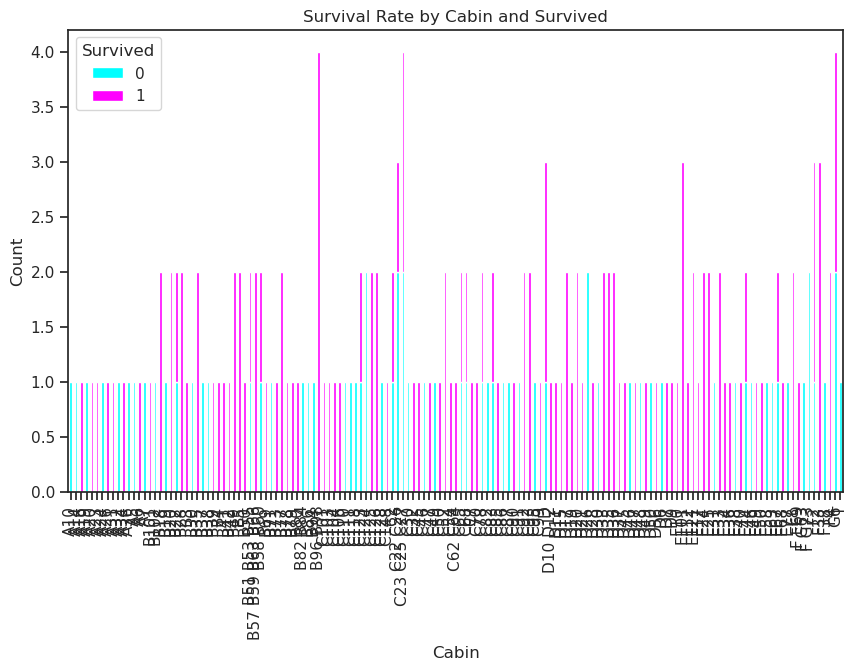

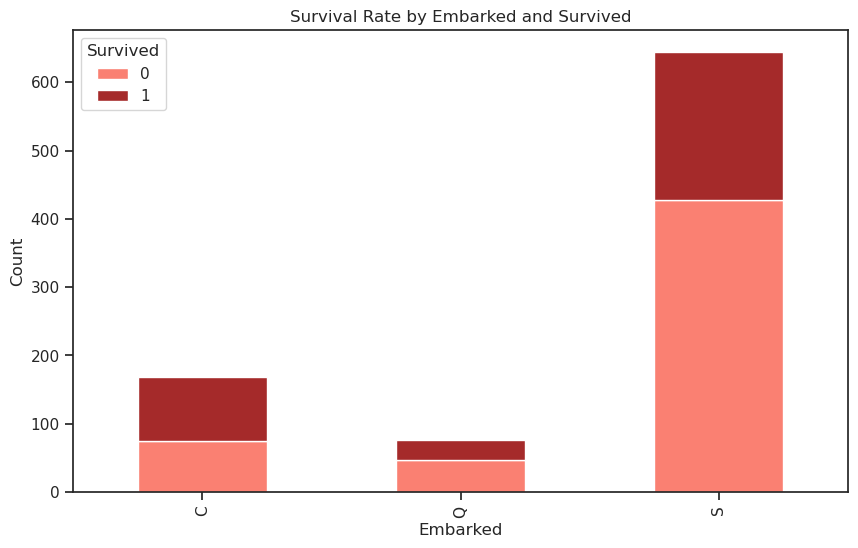

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="ticks")


def plot_distribution(feature, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[feature], ax=ax, kde=True, color=color, edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


def plot_survival_rate_by_feature(feature, color):
    feature_groups = pd.qcut(df[feature], q=4)
    feature_group_survival = df.groupby(feature_groups)['Survived'].mean()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=feature_group_survival.index, y=feature_group_survival.values, color=color, ax=ax)
    ax.set_title(f'Survival Rate by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Survival Rate')


def plot_count_by_feature(feature, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(data=df, x=feature, ax=ax, palette=color)
    ax.set_title(f'Count of Passengers by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


def plot_survival_rate_by_category(feature, category, colors):
    category_survival = df.groupby([feature, 'Survived'])[category].count().unstack()
    category_survival.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
    plt.title(f'Survival Rate by {feature} and {category}')
    plt.xlabel(feature)
    plt.ylabel('Count')


# Plot distributions of Age and Fare variables
plot_distribution('Age', 'darkblue')
plot_distribution('Fare', 'darkgreen')

# Plot survival rates by Age and Fare variables
plot_survival_rate_by_feature('Age', 'darkblue')
plot_survival_rate_by_feature('Fare', 'darkgreen')

# Plot counts of Sex, Survived and Pclass variables
plot_count_by_feature('Sex', 'husl')
plot_count_by_feature('Survived', 'husl')
plot_count_by_feature('Pclass', 'husl')

# Plot survival rates by Sex, Survived and Pclass variables
plot_survival_rate_by_category('Sex', 'Survived', ['pink', 'blue'])
plot_survival_rate_by_category('Pclass', 'Survived', ['red', 'blue'])

# Plot survival rates by SibSp, Parch, Cabin and Embarked variables
plot_survival_rate_by_category('SibSp', 'Survived', ['orange', 'green'])
plot_survival_rate_by_category('Parch', 'Survived', ['purple', 'grey'])
plot_survival_rate_by_category('Cabin', 'Survived', ['cyan', 'magenta'])
plot_survival_rate_by_category('Embarked', 'Survived', ['salmon', 'brown'])

I realized that you need to be explicit on what you want. Between the lines, I meant to drop all other charts, but I did not say that. So let's improve the prompt and ask for some brushing up:

> 💬: I like the charts titled "Survival Rate by {feature} and {category}". In a new set of visualizations, keep these charts and drop the other ones ("Distribution of {feature}", "Survival Rate by {feature}, "Count of Passengers by {feature}). Apply the same logic to the other features so that it becomes visible which feature values influence survival. Additionally, please print the percentage of survived vs. not survived. 

Percentage of survived: 38.38%
Percentage of not survived: 61.62%
Percentage of survived: 38.38%
Percentage of not survived: 61.62%
Percentage of survived: 38.38%
Percentage of not survived: 61.62%
Percentage of survived: 38.38%
Percentage of not survived: 61.62%
Percentage of survived: 38.38%
Percentage of not survived: 61.62%


posx and posy should be finite values
posx and posy should be finite values


Percentage of survived: 38.38%
Percentage of not survived: 61.62%


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

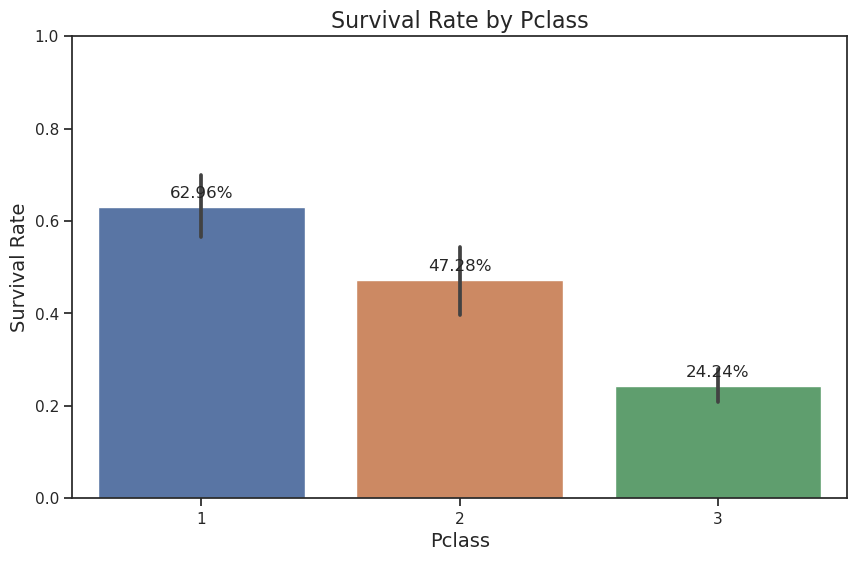

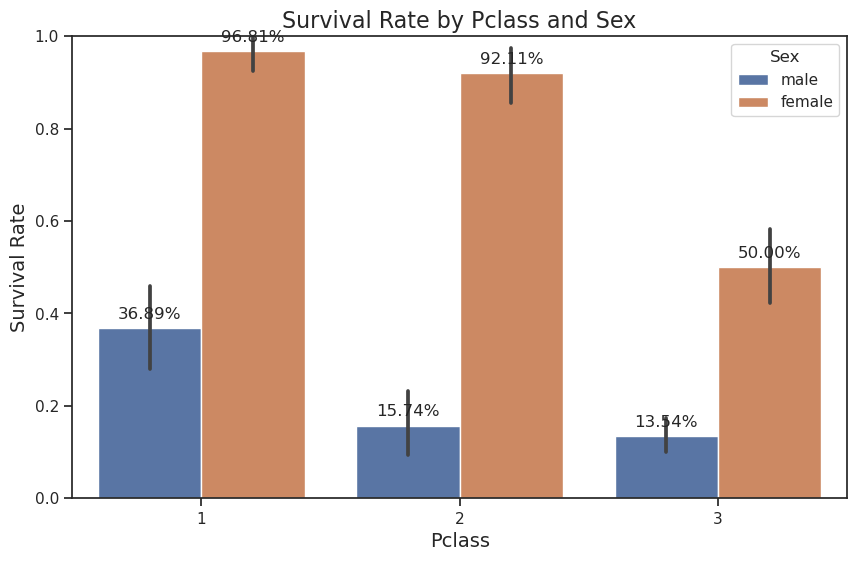

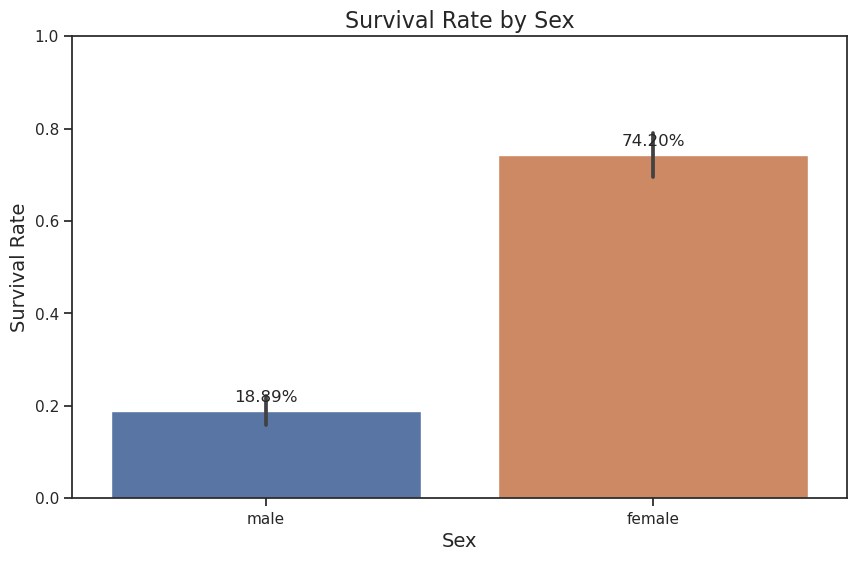

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


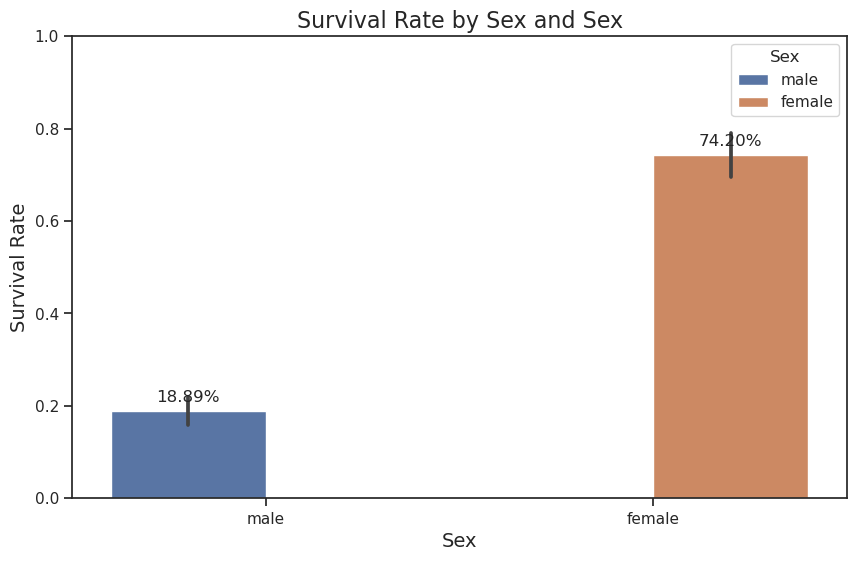

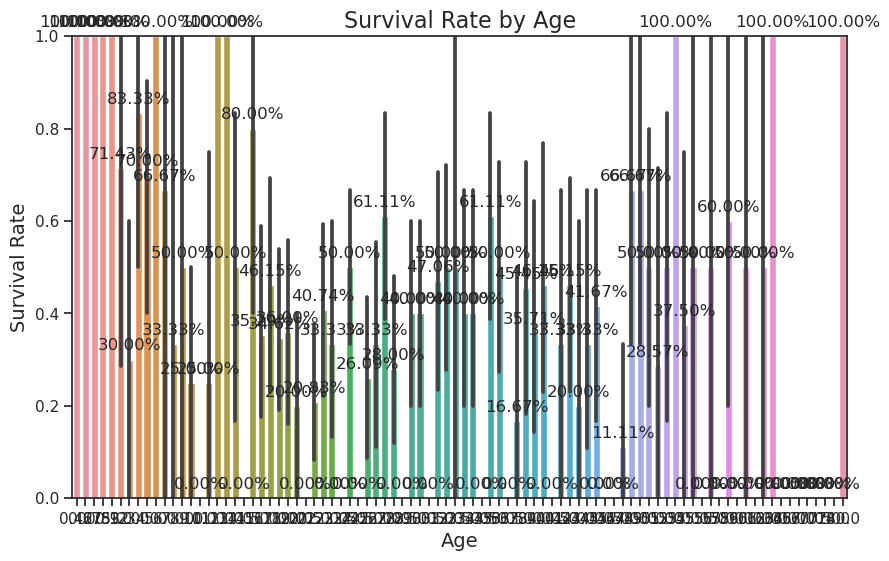

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

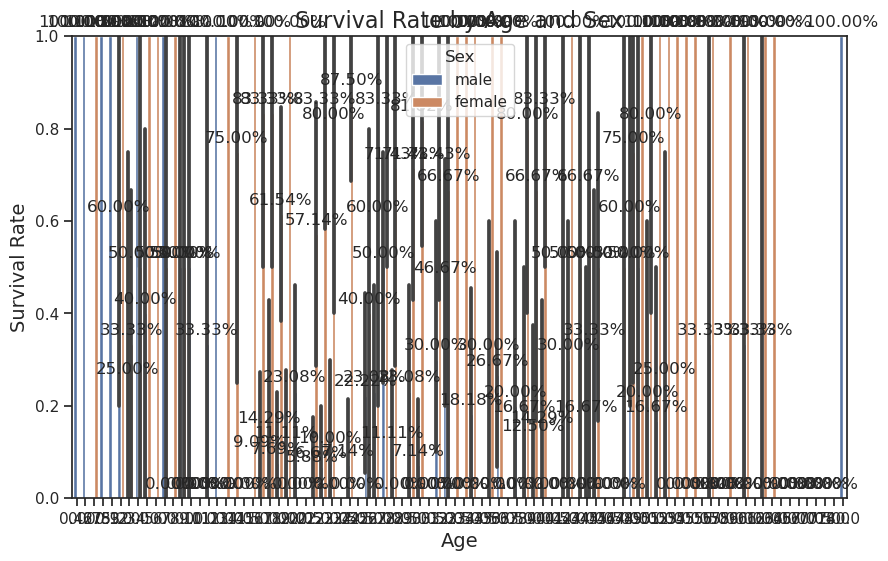

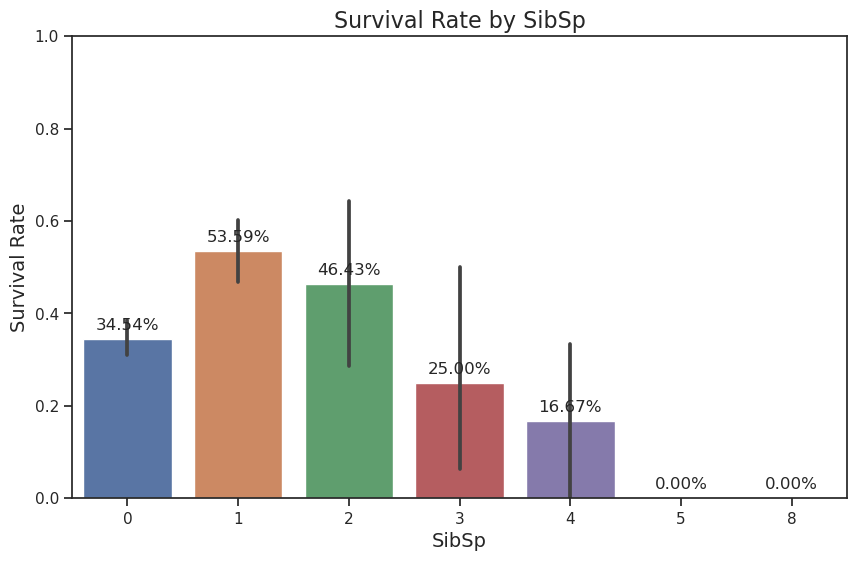

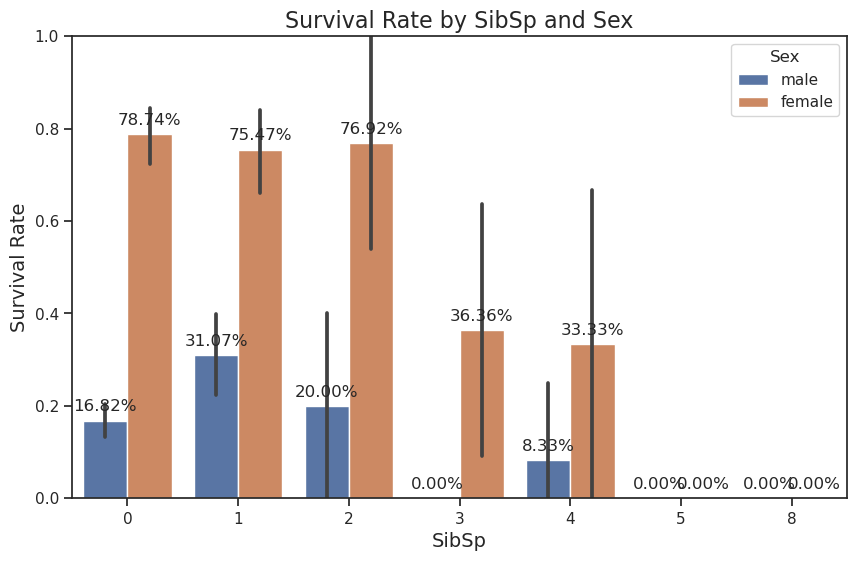

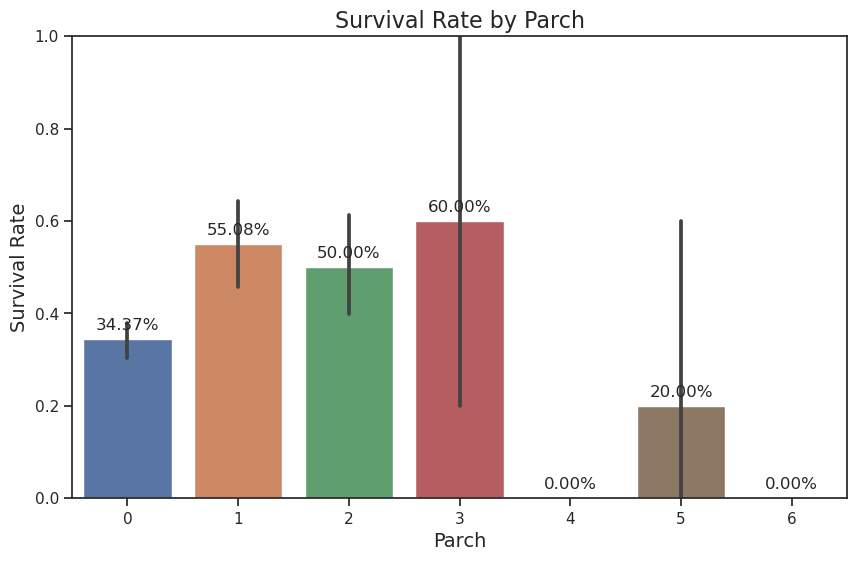

posx and posy should be finite values
posx and posy should be finite values


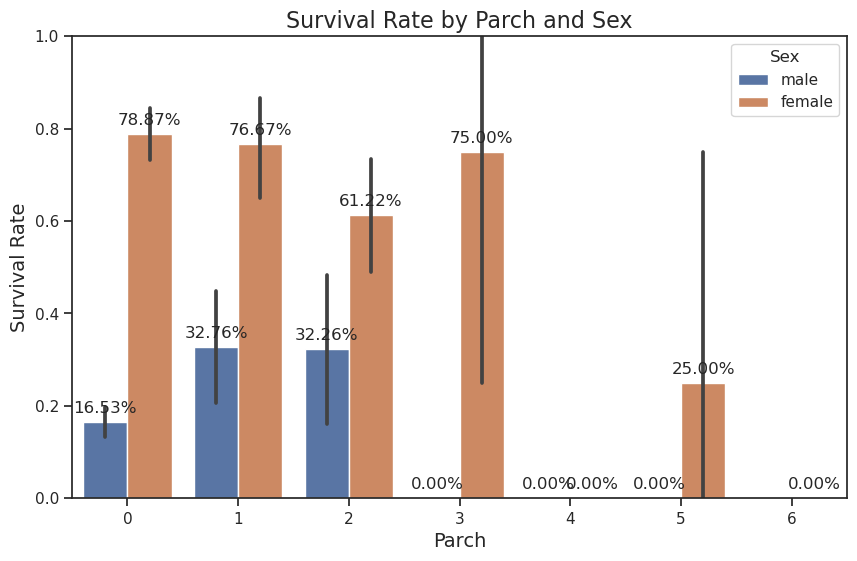

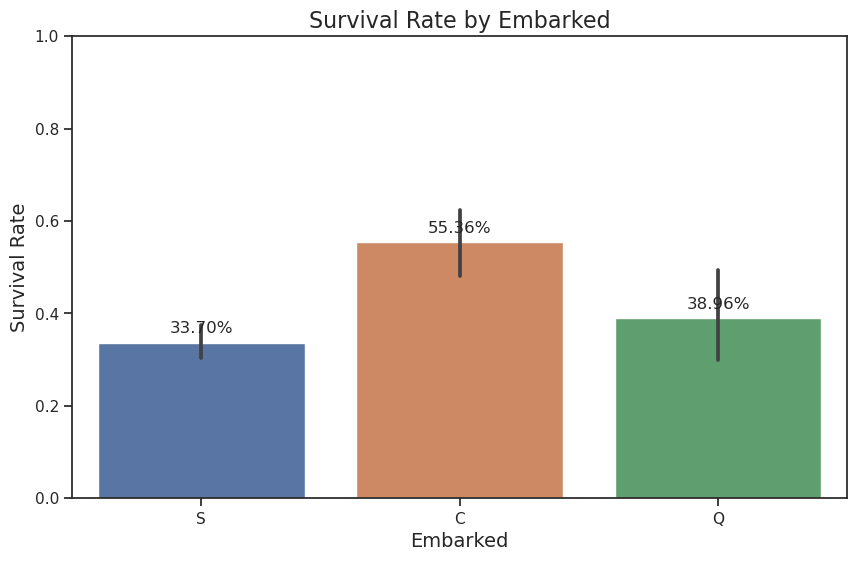

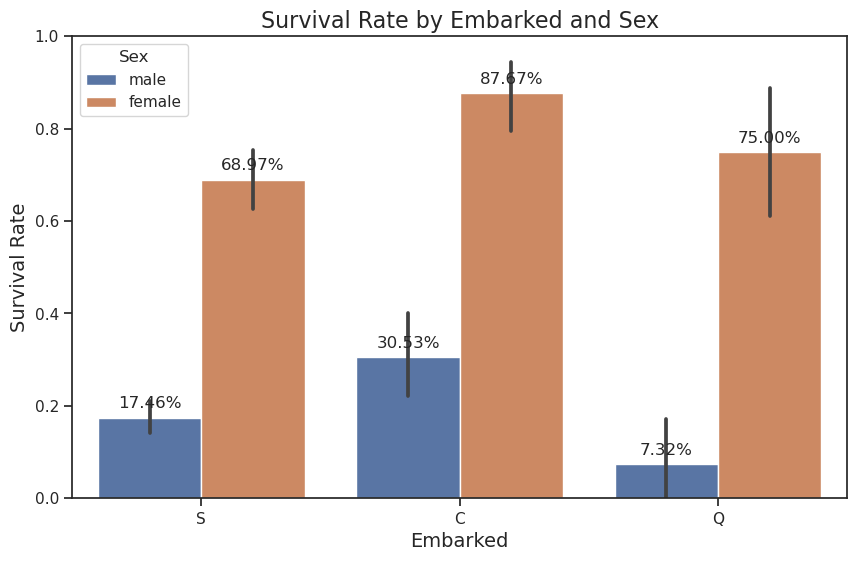

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define function for creating survival rate by feature and category charts
def survival_rate_chart(feature):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=feature, y="Survived", data=df, ax=ax)
    ax.set_title(f"Survival Rate by {feature}", fontsize=16)
    ax.set_xlabel(f"{feature}", fontsize=14)
    ax.set_ylabel("Survival Rate", fontsize=14)
    ax.set_ylim(0, 1)
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2., height + 0.02, f"{height:.2%}", ha="center")

    # Create survival rate by feature and category charts
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=feature, y="Survived", hue="Sex", data=df, ax=ax)
    ax.set_title(f"Survival Rate by {feature} and Sex", fontsize=16)
    ax.set_xlabel(f"{feature}", fontsize=14)
    ax.set_ylabel("Survival Rate", fontsize=14)
    ax.set_ylim(0, 1)
    ax.legend(title="Sex")
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2., height + 0.02, f"{height:.2%}", ha="center")

    # Print percentage of survived vs. not survived
    total_survived = df["Survived"].sum()
    total_not_survived = len(df) - total_survived
    survived_percentage = total_survived / len(df)
    not_survived_percentage = total_not_survived / len(df)
    print(f"Percentage of survived: {survived_percentage:.2%}")
    print(f"Percentage of not survived: {not_survived_percentage:.2%}")

# Create survival rate charts for each feature
survival_rate_chart("Pclass")
survival_rate_chart("Sex")
survival_rate_chart("Age")
survival_rate_chart("SibSp")
survival_rate_chart("Parch")
survival_rate_chart("Embarked")

Again, I was not specific enough. Apart from asking ChatGPT to correct the error, I also asked to put the percentages in the charts, not printed separately. Do not assume that common sense would have dictated that.

> 💬: There are error/warnings "posx and posy should be finite values" and some values are missing in the charts. Please correct the code. Additionally, there is no need to write the percentage of survived vs not survived above the charts, the labels in the charts are sufficient.

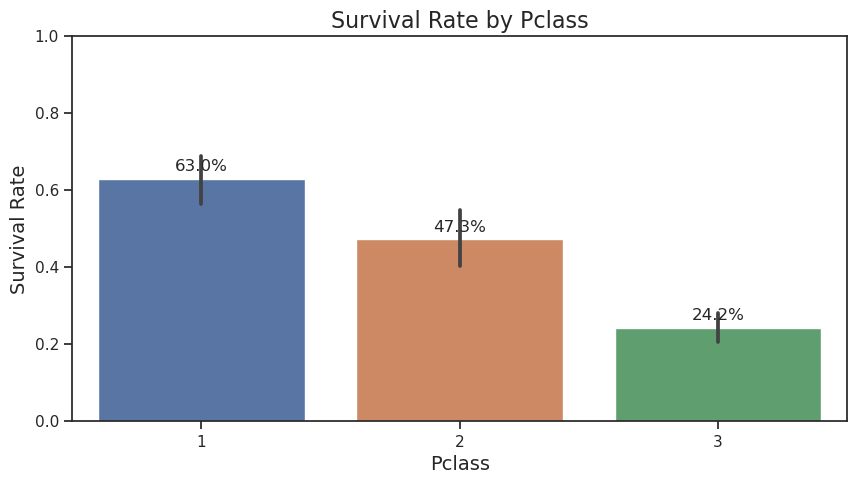

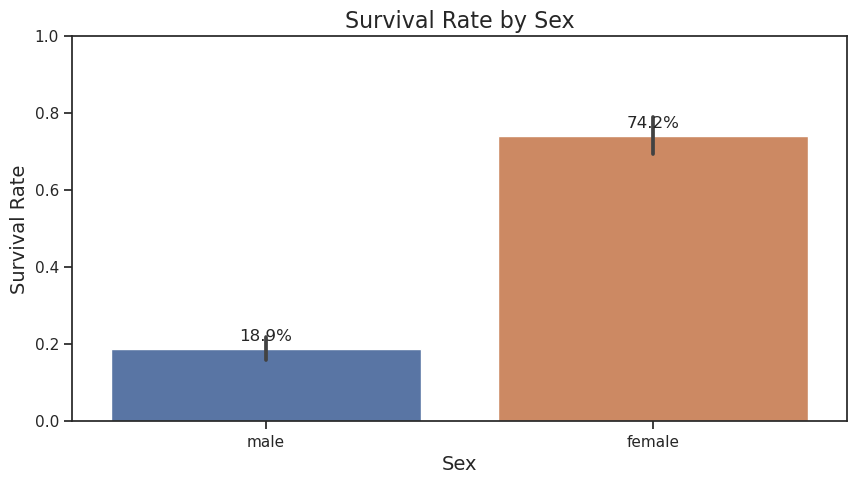

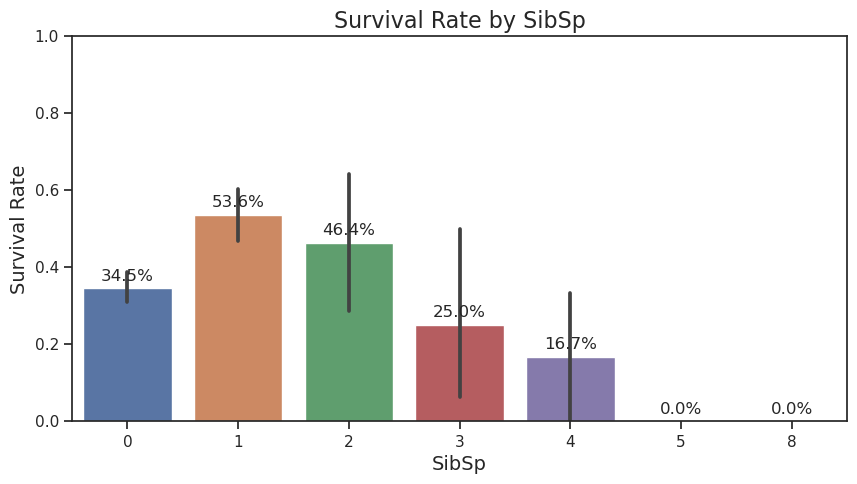

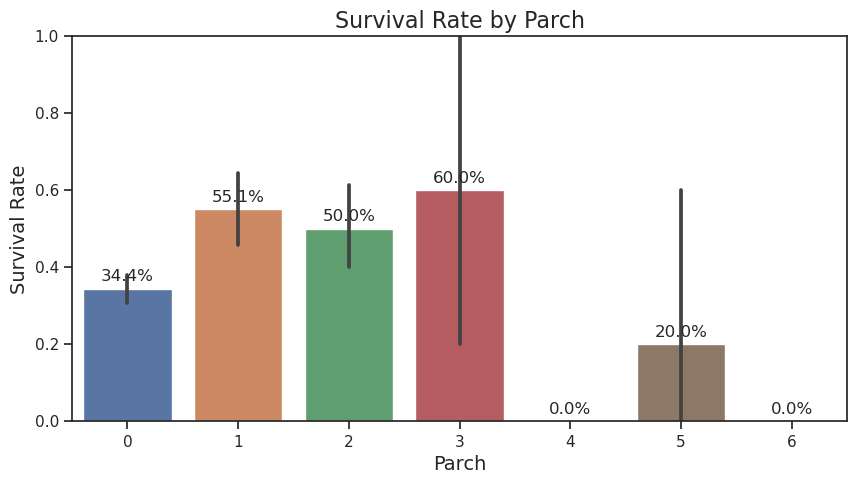

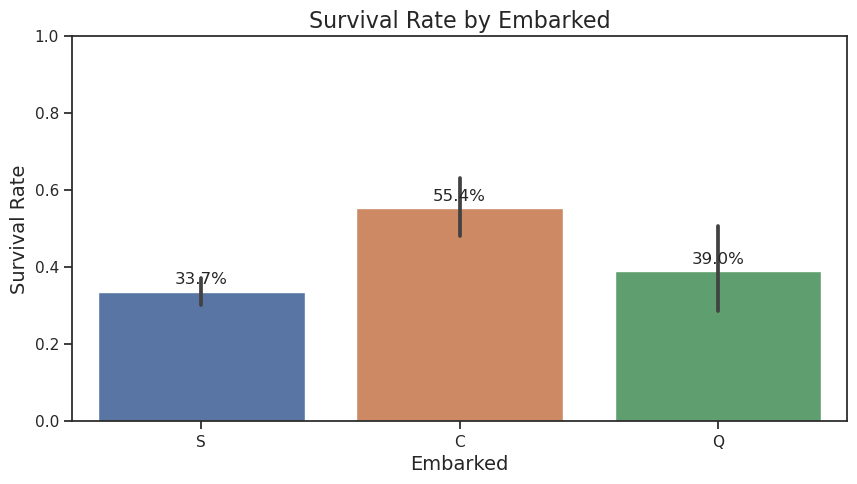

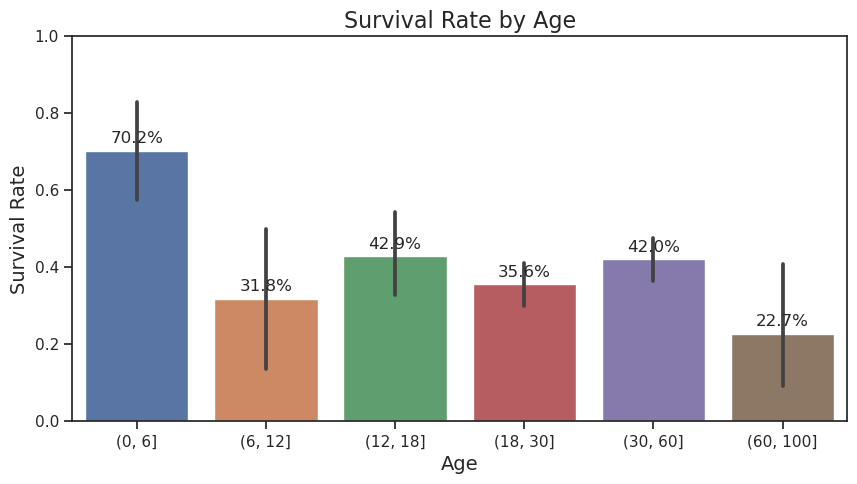

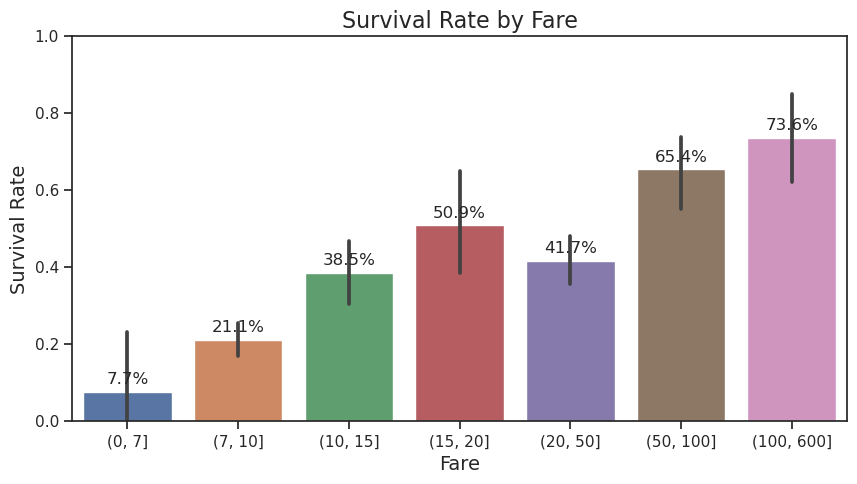

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot survival rate for a categorical feature
def plot_cat_survival_rate(feature):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"Survival Rate by {feature}", fontsize=16)
    sns.barplot(data=df, x=feature, y="Survived", ax=ax)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel("Survival Rate", fontsize=14)
    ax.set_ylim(0, 1)
    
    # Add survival percentage text to bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+0.02, f'{height*100:.1f}%', ha="center")
        
    plt.show()

# Function to plot survival rate for a numeric feature
def plot_num_survival_rate(feature, bins=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"Survival Rate by {feature}", fontsize=16)
    if bins:
        df[feature+'_bin'] = pd.cut(df[feature], bins=bins)
        sns.barplot(data=df, x=feature+'_bin', y="Survived", ax=ax)
        ax.set_xlabel(feature, fontsize=14)
    else:
        sns.histplot(data=df, x=feature, hue="Survived", element="step", stat="density", common_norm=False, ax=ax, palette=['red', 'green'])
        ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel("Survival Rate", fontsize=14)
    ax.set_ylim(0, 1)
    
    # Add survival percentage text to bars
    #if not bins: #<- commented out this line and changed the intentation below to display the percentages in the charts
    for p in ax.patches:
        if not np.isnan(p.get_height()):
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height+0.02, f'{height*100:.1f}%', ha="center")
        
    plt.show()

# Plot survival rate for categorical features
for feature in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    plot_cat_survival_rate(feature)

# Plot survival rate for numeric features
plot_num_survival_rate('Age', bins=[0, 6, 12, 18, 30, 60, 100]) #tweaked
plot_num_survival_rate('Fare', bins=[0, 7, 10, 15, 20, 50, 100, 600]) #tweaked

The result only had one flaw, the percentages did not show up in the last 2 charts, but that was easily fixed manually.

Asking ChatGPT to fix the error resulted in quite a long conversation, and it did not solve the problem, instead ChatGPT created different variations of the charts, somehow avoiding the real problem by doing something else. To be fair, it is amazing that ChatGPT can correct many errors when pointed at them, but it cannot run or debug the code. All it can do is read the code and respond.

## Creating the 1R-model

Looking at the chart above (really nice visualizations), we found what we already knew upfront - for example, if you watched the Fast.AI lesson 😉: The gender is the single most influential feature on survival. Therefore, let's create a simple model which does a binary split.

> 💬: Create a binary classifier based on the column "Sex": If a passenger is male, he did not survive, if she was a woman, she did survive. Output a csv-file called "submission-binary-gender-classifier.csv" containing he columns "PassengerId" and the predicted field "Survived".

In [32]:
import pandas as pd

# Load the Titanic dataset
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')

# Create a binary classifier based on the 'Sex' column
test_df['Survived'] = test_df['Sex'].apply(lambda x: 1 if x == 'female' else 0)

# Select the required columns
submission = test_df[['PassengerId', 'Survived']]

# Output the predicted survival status as a CSV file
submission.to_csv('submission-binary-gender-classifier.csv', index=False)

The submission to the competition was successful, and 76.555% is the mark to beat with any more sophisticated model.

![](submission-binary-gender-classifier.png)